In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.datasets.mnist

In [3]:
dataset

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\vicky\\AppData\\Roaming\\Python\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [4]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

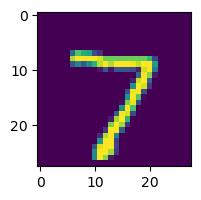

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[0])

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
model = tf.keras.Sequential([
    #CNN
    keras.layers.Conv2D(filters=20, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    #ANN
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 30)        5430      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 750)               0         
                                                                 
 dense (Dense)               (None, 150)               1

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [16]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1499 - acc: 0.9537 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0488 - acc: 0.9844 - val_loss: 0.0344 - val_acc: 0.9895
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0337 - acc: 0.9895 - val_loss: 0.0476 - val_acc: 0.9849
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0258 - acc: 0.9921 - val_loss: 0.0401 - val_acc: 0.9871
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0334 - val_acc: 0.9895
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0166 - acc: 0.9948 - val_loss: 0.0320 - val_acc: 0.9903
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0130 - acc: 0.9956 - val_loss: 0.0375 - val_acc: 0.9898
Epoch 8/10
1875/1875 [==========================

In [17]:
# model.save("mnist_model.h5")

## Testing with External Image

In [18]:
from tensorflow.keras.preprocessing import image
test = r"D:\image for testing\number 4.jpeg"

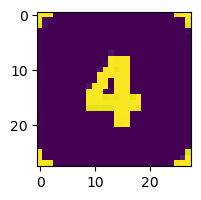

In [19]:
img = image.load_img(test, target_size=(28, 28), color_mode="grayscale")
plt.figure(figsize=(2,2))
plt.imshow(img, interpolation="nearest")
plt.show()

In [20]:
import numpy as np
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis= 0)
result = model.predict(test_image)
result

1/1 [==============================] - 0s 269ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
predicted_label = np.argmax(result)
print("Predicted Label:", predicted_label)

Predicted Label: 4


## inbuilt dataset test

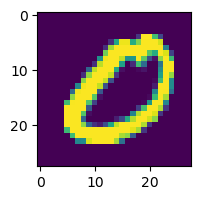

In [29]:
import random
n = random.randint(0,9999)
plt.figure(figsize=(2,2))
plt.imshow(x_test[n])

In [30]:
x_test = x_test.reshape(-1, 28, 28, 1)

In [31]:
predicted_val = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [32]:
print("Predicted Label:", np.argmax(predicted_val[n]))

Predicted Label: 0
